## Constant acceleration

For this section of the course we will assume a constant *vector* acceleration, $a$, in a straight line.

Mostly we will be considering vector quantities, *velocity* and *displacement* as opposed to scalar *speed* and *distance*.

A rocket is travelling at $20ms^{-1}$. It accelerates at $2ms^{-2}$.

What is the rocket's velocity after 5 seconds?

How far has the rocket travelled in this time?

Acceleration is the rate of change of velocity so $a=\dfrac{\text{Change in velocity}}{\text{Time taken}}=\dfrac{v-u}{t}$

This rearranges to $$v-u=at$$

That makes intuitive sense: the velocity starts at $u$ and increases (or decreases) by $a$ every second until it gets to $v$.

So our rocket will accelerate from $20\text{ms}^{-1}$ to $30\text{ms}^{-1}$. But how far will it have travelled?

In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Initial velocity
u = 20
# Acceleration
a = 2
# One hundred times between 0 and 5s
t = np.linspace(0,5,100)

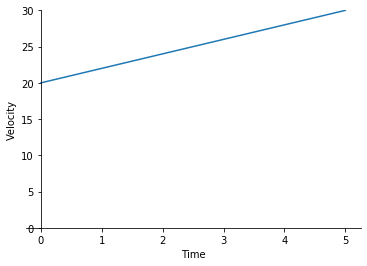

In [60]:
fig, ax = plt.subplots()

ax.set_ylabel("Velocity")
ax.set_xlabel("Time")
ax.set_ylim(0,30)

ax.spines["left"].set_position('zero')
ax.spines["bottom"].set_position('zero')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(t,u+a*t);

How do we work out the distance travelled?<br>
Is this any easier if we think of a constant velocity?

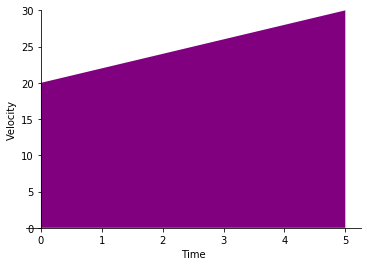

In [46]:
fig, ax = plt.subplots()

ax.set_ylabel("Velocity")
ax.set_xlabel("Time")
ax.set_ylim(0,30)

ax.spines["left"].set_position('zero')
ax.spines["bottom"].set_position('zero')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.fill_between(t,0, u+a*t, facecolor = "purple");

How do we find the area (representing the distance travelled)?<br>Come up with as many different ways to do this as you can think of.

In this diagram, $s=\color{red}{Red}+\color{blue}{Blue}=\color{red}{ut}+\color{blue}{\frac{1}{2}(v-u)t}$

But $v-u=at$ so this becomes $s=ut+\frac{1}{2}at^2=100+\frac{1}{2}2\times5^2=125\text{m}$

What does the red area represent in this case?

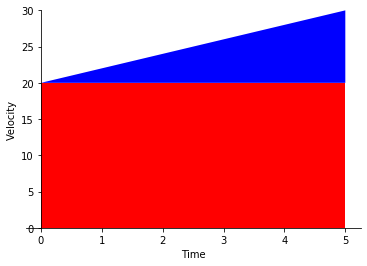

In [47]:
fig, ax = plt.subplots()

ax.set_ylabel("Velocity")
ax.set_xlabel("Time")
ax.set_ylim(0,30)

ax.spines["left"].set_position('zero')
ax.spines["bottom"].set_position('zero')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.fill_between(t,0,u, facecolor="red")
ax.fill_between(t,u,u+a*t, facecolor="blue");

Alternatively, $s=vt-\color{green}{Green}=vt-\color{green}{\frac{1}{2}(v-u)t}$

Hence $s=vt-\frac{1}{2}at^2=150-\frac{1}{2}2\times5^2=125\text{m}$

What does the "green plus black" area represent in this case?

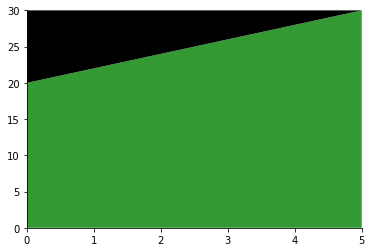

In [48]:
fig, ax = plt.subplots()
ax.set_xlim(0,5)
ax.set_ylim(0,30)
ax.spines["left"].set_position('zero')
ax.spines["bottom"].set_position('zero')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


ax.fill_between(t,0,u+a*t, facecolor="green",alpha=0.8)
ax.fill_between(t,u+a*t, 30, facecolor="black");


A third possibility is $s=\color{purple}{Purple\,trapezium}=\dfrac{u+v}{2}t=\dfrac{20+30}{2}\times5=125\text{m}$

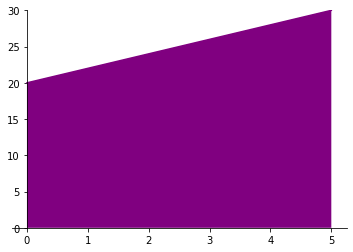

In [49]:
fig, ax = plt.subplots()
ax.set_ylim(0,30)
ax.spines["left"].set_position('zero')
ax.spines["bottom"].set_position('zero')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(t,u+a*t,c="purple")
ax.fill_between(t,0,u+a*t,facecolor="purple");

So far we have

$\begin{aligned}
v&=u+at\\
s&=\dfrac{u+v}{2}t\\
s&=ut+\frac{1}{2}at^2\\
s&=vt-\frac{1}{2}at^2
\end{aligned}$

Each of these has four of the five unknowns. There should be a fifth equation, one that doesn't involve $t$.

The easiest pair to eliminate $t$ from are $\begin{cases}v=u+at\\s=\dfrac{u+v}{2}t\end{cases}$

$\begin{cases}t=\dfrac{v-u}{a}\\\\t=\dfrac{2s}{u+v}\end{cases} \dfrac{v-u}{a}=\dfrac{2s}{u+v}\implies v^2-u^2=2as$

This is usually written $v^2=u^2+2as$

Finally then, we have five equations, each involving four of the variables

$\begin{aligned}
v&=u+at\\
s&=\dfrac{u+v}{2}t\\
s&=ut+\frac{1}{2}at^2\\
s&=vt-\frac{1}{2}at^2\\
v^2&=u^2+2as
\end{aligned}$

In [50]:
from sympy import *
import numpy as np
s,u,v,a,t,x,y = symbols('s u v a t x y')
init_printing()

## Random `suvat` question generator

In [53]:
# some handy functions
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [56]:
def generate_question():

    u = np.random.choice([-3,-2,-1,1,2,3,4,5])
    t = np.random.choice([1,2,2,3,4,5,8,12,15,20,30,45])
    a = np.random.choice([-3,-2,-1,1,2,3,5,-9.8,10])
    s = round(u*t+0.5*a*t**2,2)
    v = round(u+a*t,2)
    variables = {
        "u": u,
        "v": v,
        "a": a,
        "s": s,
        "t": t}
    involved = np.random.choice(list(variables.keys()),size=4,replace=False)
    given = involved[:-1]
    find = involved[-1]
    
    return variables, given, find

In [72]:
answer = widgets.Button(description="Show answer")
question = widgets.Button(description="New question")
out = widgets.Output()
answerShown = False

variables, given, find = generate_question()

def display_question():
    global variables, given, find
    with out:
        clear_output()
        for variable in given:
            print("{}={}".format(variable,variables[variable]))
        print("Find {}".format(find))
        
def display_answer():
    with out:
        #clear_output()
        print("\n{} = {}".format(find, variables[find])) 
        
def on_question_click(_):
    global variables, given, find
    variables, given, find = generate_question()
    display_question()   
        
def on_answer_click(_):
    global answerShown
    if(answerShown):
        display_question()
    else:
        display_answer()
    answerShown = not answerShown
              
question.on_click(on_question_click)
answer.on_click(on_answer_click)

display_question()

widgets.VBox([question, answer, out])

## Constant acceleration

>Prosecutor: "Although I accept that you left the traffic lights at rest, you were snapped by the camera doing $133kmh^{−1}$, which is found at a distance of $338$ metres from the traffic lights. I claim that this is ample distance to reach the speed shown on the ticket."
>
>Defendant: "But the specifications in the manual of my cheap car show that the maximum acceleration is $0$ to $96kmh^{−1}$ in $10.5s$. I could never have accelerated to such a high speed in such a short distance!"
>
>Analyse this case carefully. Could the penalty reasonably be rejected on mathematical grounds?